In [1]:
import pandas
from pandas import read_csv
data=read_csv('emails.csv')
data.describe()

,spam
count,5726.000000
mean,0.238736
std,0.426348
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [2]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [3]:
data.count()

text    5726
spam    5726
dtype: int64

In [4]:
Null_Data = data.isnull().sum()
Rows=data.shape[0]
Null_Columns = [] 
for i in range(len(Null_Data)):
    if Null_Data[i] == Rows - 1 or Null_Data[i] == Rows:
        Null_Columns.append(Column_Names[i])
Null_Columns  

[]

In [5]:
for i in Null_Columns: 
    del data[i]
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5721,Subject: re : research and development charges...,0
5722,"Subject: re : receipts from visit jim , than...",0
5723,Subject: re : enron case study update wow ! a...,0
5724,"Subject: re : interest david , please , call...",0


In [6]:
data.isnull().any()

text    False
spam    False
dtype: bool

In [7]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [8]:
data[data.isnull().any(axis=1)]

,text,spam


In [9]:
data.dropna(inplace=True)
data.isnull().any()

text    False
spam    False
dtype: bool

In [10]:
print(data.isnull().sum())

text    0
spam    0
dtype: int64


In [11]:
data.shape

(5726, 2)

In [12]:
duplicate = data[data.duplicated()] 
print("Number of Duplicate rows: ", duplicate.shape)
data.count()

Number of Duplicate rows:  (33, 2)


text    5726
spam    5726
dtype: int64

In [13]:
data = data.drop_duplicates()
data.count()

text    5693
spam    5693
dtype: int64

In [14]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5693 entries, 0 to 5725
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5693 non-null   object
 1   spam    5693 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 133.4+ KB


In [16]:
data.describe()

,spam
count,5693.000000
mean,0.240119
std,0.427193
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [17]:
Columns = data.shape[1]
Rows = data.shape[0]
print("Rows :", Rows) 
print("Columns :", Columns)

Rows : 5693
Columns : 2


In [18]:
data['Length'] = data['text'].apply(len)
data['Length'].max()

C:\Users\dell\AppData\Local\Temp\ipykernel_9040\2917656987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Length'] = data['text'].apply(len)


31055

In [19]:
data.describe()

,spam,Length
count,5693.000000,5693.000000
mean,0.240119,1543.172317
std,0.427193,1886.930857
min,0.000000,13.000000
25%,0.000000,508.000000
50%,0.000000,979.000000
75%,0.000000,1891.000000
max,1.000000,31055.000000


In [20]:
data.groupby('spam').describe()

Length                                                                
       count         mean          std   min    25%     50%     75%      max
spam                                                                        
0     4326.0  1614.353213  1741.930460  13.0  575.5  1122.0  2036.5  31055.0
1     1367.0  1317.913680  2272.067352  18.0  402.0   694.0  1252.5  28432.0

In [21]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
from nltk.tokenize import word_tokenize
Ham_Words_Length = [len(word_tokenize(title)) for title in data[data['spam']==0].text.values]
Spam_Words_Length = [len(word_tokenize(title)) for title in data[data['spam']==1].text.values]
print("\nHam Words Length :", max(Ham_Words_Length))
print("\nSpam Words Length :", max(Spam_Words_Length))
if max(Ham_Words_Length) > max(Spam_Words_Length): 
    print("\nHam Text Length is Larger") 
else: 
    print("\nSpam Text Length is Larger")


Ham Words Length : 6350

Spam Words Length : 6131

Ham Text Length is Larger


In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords
import string
class Data_Clean():
     def __init__(self):
        pass
     def Message_Cleaning(self, message):
        Text = [char for char in message if char not in string.punctuation]
        Text = ''.join(Text)
        Text_Filtered = [word for word in Text.split() if word.lower() not in stopwords.words('english')]
        Text_Filtered = ' '.join(Text_Filtered)
        return Text_Filtered
 
     def Clean(self, U_data):
        C_Data = U_data.apply(self.Message_Cleaning)
        return C_Data
Cleaned_Data = Data_Clean()
data['Cleaned Text'] = Cleaned_Data.Clean(data['text'])
data.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_9040\3156316534.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cleaned Text'] = Cleaned_Data.Clean(data['text'])


,text,spam,Length,Cleaned Text
0,Subject: naturally irresistible your corporate...,1,1484,Subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,598,Subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,448,Subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,500,Subject 4 color printing special request addit...
4,"Subject: do not have money , get software cds ...",1,235,Subject money get software cds software compat...


In [25]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()
def transform_text(text):
    text = text.lower() 
    text = nltk.word_tokenize(text)
    y = [] 
    for i in text: 
        if i.isalnum(): 
            y.append(i)
            text = y[:] 
            y.clear()
        for i in text: 
            if i not in stopwords.words('english') and i not in string.punctuation:
                    y.append(i)
                    text = y[:] 
                    y.clear()
                    for i in text:
                        y.append(ps.stem(i))
                    return " ".join(y)
data['Cleaned Text'] = data['Cleaned Text'].apply(transform_text)
data.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_9040\3834195829.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cleaned Text'] = data['Cleaned Text'].apply(transform_text)


,text,spam,Length,Cleaned Text
0,Subject: naturally irresistible your corporate...,1,1484,subject
1,Subject: the stock trading gunslinger fanny i...,1,598,subject
2,Subject: unbelievable new homes made easy im ...,1,448,subject
3,Subject: 4 color printing special request add...,1,500,subject
4,"Subject: do not have money , get software cds ...",1,235,subject


C:\Users\dell\AppData\Local\Temp\ipykernel_9040\2096345928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ham(0) and Spam(1)'] = data['spam']
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ham(0) and Spam(1)', ylabel='count'>

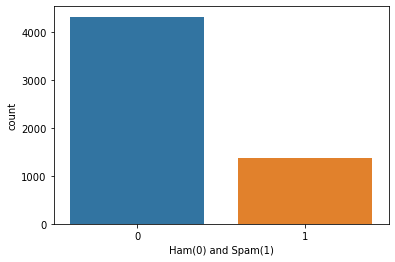

In [27]:
import seaborn as sn
ham = data.loc[data['spam']==0]
spam = data.loc[data['spam']==1]
spam['Length'].plot(bins=60, kind='hist') 
data['Ham(0) and Spam(1)'] = data['spam']
sn.countplot(data['Ham(0) and Spam(1)'], label = "Count")

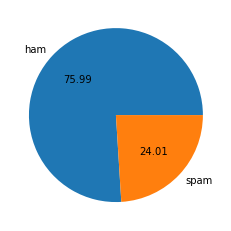

In [28]:
import matplotlib.pyplot as plt
plt.pie(data['spam'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()


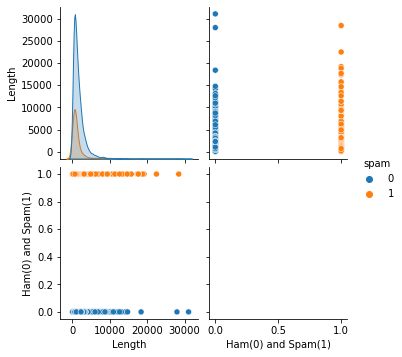

In [30]:
import seaborn as sn
sn.pairplot(data, hue='spam')

C:\Users\dell\AppData\Local\Temp\ipykernel_9040\2929855084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Num Characters'] = data['text'].apply(len)
C:\Users\dell\AppData\Local\Temp\ipykernel_9040\2929855084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Num Words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))
C:\Users\dell\AppData\Local\Temp\ipykernel_9040\2929855084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

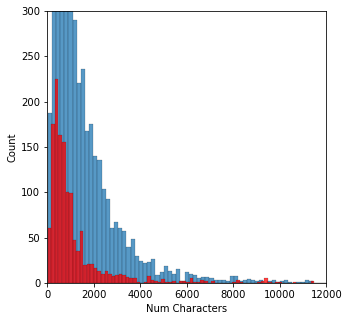

In [31]:
data['Num Characters'] = data['text'].apply(len)
data['Num Words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))
data['Num Sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x))
)
import seaborn as sns
plt.figure(figsize=(5,5))
sns.histplot(data[data['spam'] == 0]['Num Characters'])
sns.histplot(data[data['spam'] == 1]['Num Characters'], color='red')
plt.xlim(0, 12000);
plt.ylim(0, 300);


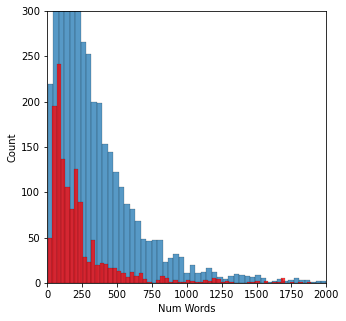

In [32]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.histplot(data[data['spam'] == 0]['Num Words'])
sns.histplot(data[data['spam'] == 1]['Num Words'], color='red')
plt.xlim(0, 2000);
plt.ylim(0, 300);


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


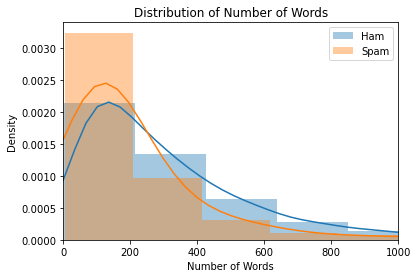

In [33]:
ax = sn.distplot(Ham_Words_Length, norm_hist = True, bins = 30, label = 'Ham')
ax = sn.distplot(Spam_Words_Length, norm_hist = True, bins = 30, label = 'Spam')
print()
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.legend()
plt.xlim(0, 1000);
 
plt.show()
